In [ ]:
%config Completer.use_jedi = False

In [ ]:
from fastai.vision.all import *

In [26]:
import skimage.io
import cv2 as cv


<module 'PIL.Image' from 'D:\\Anaconda3\\envs\\deeplearning\\lib\\site-packages\\PIL\\Image.py'>

In [ ]:
!conda install -c conda-forge gdal

In [3]:
tiff_path=Path(r'C:\Users\ANANYA\Desktop\SGRR_Pap\HSIL\29')

In [31]:
FSI=skimage.io.imread(fold.ls()[1],plugin='pil')

UnidentifiedImageError: cannot identify image file 'C:\\Users\\ANANYA\\Desktop\\SGRR_Pap\\HSIL\\29.tif'

In [32]:
Image.open(fold.ls()[1])

UnidentifiedImageError: cannot identify image file 'C:\\Users\\ANANYA\\Desktop\\SGRR_Pap\\HSIL\\29.tif'

In [22]:
im_tens=cv.imread(str(fold.ls()[1]))


In [25]:
str(fold.ls()[1])

'C:\\Users\\ANANYA\\Desktop\\SGRR_Pap\\HSIL\\29.tif'

In [20]:
fold=Path(r'C:\Users\ANANYA\Desktop\SGRR_Pap\HSIL')

In [8]:
fold.ls()[1]

Path('C:/Users/ANANYA/Desktop/SGRR_Pap/HSIL/29.tif')

In [ ]:
C:\Users\ANANYA\Desktop\SGRR_Pap\HSIL

In [4]:
segmentation_data_path=Path(r'C:\Users\ANANYA\Desktop\SGRR_Pap\HSIL')
mask_path=segmentation_data_path/'img_masks'


In [5]:
def tiff_to_lbl_masks(tiff_path,lbl_path,lbl_extension='.jpg',**kwargs):
    tiff_files=get_image_files(tiff_path)
    for i,tiff_file in enumerate(tiff_files):
        mask=skimage.io.imread(tiff_file)
        mask=PILMask.create(mask)
        mask_fname=str(lbl_path/tiff_file.stem)+lbl_extension
        mask.save(fp=Path(mask_fname))
        print(i)

In [6]:
img_path,lbl_path,tiff_path=segmentation_data_path/'images',segmentation_data_path/'img_masks',segmentation_data_path/'tiff_masks'
lbl_path.mkdir(exist_ok=True)


In [7]:
tiff_to_lbl_masks(tiff_path=tiff_path,lbl_path=lbl_path)

0
1


In [8]:
img_fname,lbl_fname=(img_path.ls())[0],(lbl_path.ls())[0]


img_fname,lbl_fname

(Path('C:/Users/ANANYA/Desktop/cytology_segmenation_model/images/NL_1_ (13).jpg'),
 Path('C:/Users/ANANYA/Desktop/cytology_segmenation_model/img_masks/NL_1__(13)_Cellular-Tissue.ome.jpg'))

In [10]:
def get_msk(img_path,msk_str='_Cellular-Tissue.ome'):
    rep=img_path.stem
    rep=rep.replace(' ','_',1)
    return lbl_path/f'{rep}{msk_str}{img_path.suffix}'

assert get_msk(img_fname)==lbl_fname     

In [11]:
assert get_msk(img_fname)==lbl_fname

img,msk=PILImage.create(img_fname),PILMask.create(get_msk(img_fname))
size=msk.shape

def resize_shape(sz,factor=0.5):return tuple(int(x*factor) for x in sz)


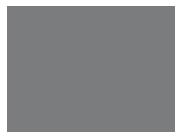

In [12]:
Tissue = DataBlock(blocks=(ImageBlock, MaskBlock(codes=np.array(['background','cellular_tissue']))),
                   get_items=get_image_files, get_y=get_msk,
                   splitter=RandomSplitter(valid_pct=0.),
                   batch_tfms=[*aug_transforms(do_flip=True,flip_vert=True,max_warp=0.)],item_tfms=Resize(size=resize_shape(size,factor=0.25)))

dls=Tissue.dataloaders(img_path,bs=1,num_workers=0)
x,y=dls.one_batch()
x.shape,y.shape

dls.show_batch(vmin=0,vmax=1,cmap='Blues')



In [12]:
aug_transforms

<function fastai.vision.augment.aug_transforms(mult=1.0, do_flip=True, flip_vert=False, max_rotate=10.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=None, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)>

In [ ]:
def get_dls(presize,size,bs,img_path):
    DataBlock(blocks=(ImageBlock, MaskBlock(codes=np.array(['background','cellular_tissue']))),
                   get_items=get_image_files, get_y=get_msk,
                   splitter=RandomSplitter(valid_pct=0.2),
                   batch_tfms=[*aug_transforms(do_flip=True,flip_vert=True,max_warp=0.)],item_tfms=Resize(size=resize_shape(size,factor=0.25)))

    return Tissue.dataloaders(img_path,bs=bs,num_workers=0)
    
    
    

In [ ]:
dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
get_items=get_image_files,
get_y=parent_label,
item_tfms=Resize(460),
batch_tfms=aug_transforms(size=224,
min_scale=0.75))
dls = dblock.dataloaders(path, bs=64)

In [18]:
DataBlock()

AttributeError: 'DataBlock' object has no attribute 'databunch'

In [14]:
Tissue = DataBlock(blocks=(ImageBlock, MaskBlock(codes=np.array(['background','cellular_tissue']))),
                   get_items=get_image_files, get_y=get_msk,
                   splitter=RandomSplitter(valid_pct=0.),
                   batch_tfms=[*aug_transforms(do_flip=True,flip_vert=True,max_warp=0.)])
dls=Tissue.dataloaders(img_path,bs=1,num_workers=0)




dls.show_batch(vmin=0,vmax=1,cmap='Blues')



Could not do one pass in your dataloader, there is something wrong in it


RuntimeError: CUDA error: device-side assert triggered

In [13]:
learn = unet_learner(dls, resnet18)

In [21]:
torch.cuda.empty_cache()

In [47]:


imgs,masks=dls.one_batch()



In [33]:
def show_img_with_mask(batch,max_show=5):
    imgs,masks=batch
    n_items=imgs.shape[0]
    assert n_items==masks.shape[0]
    for i in range(min(n_items,max_show)):
        imgs[i].show(),masks[i].show()
        

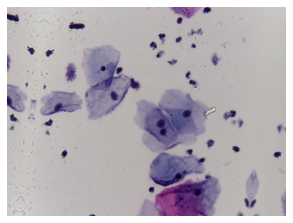

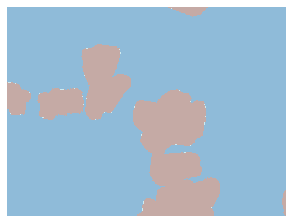

In [34]:
show_img_with_mask(dls.one_batch())


In [14]:
learn.fine_tune(1)

RuntimeError: CUDA error: device-side assert triggered

In [41]:
learn.model

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

In [27]:
type(msk)

fastai.torch_core.TensorMask

(<AxesSubplot:>, <AxesSubplot:>)

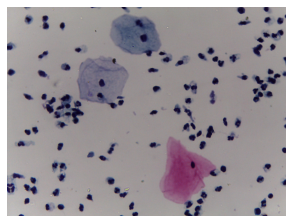

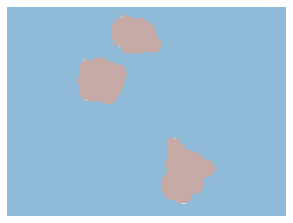

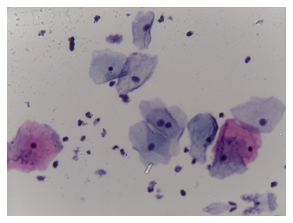

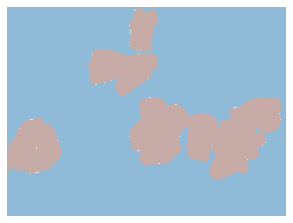

In [41]:
x,y=dls.one_batch()
x.shape,y.shape

x[0].show(),y[0].show()
x[1].show(),y[1].show()


In [44]:
Tissue.blocks

(fastai.data.block.TransformBlock, fastai.data.block.TransformBlock)

<function fastai.vision.data.MaskBlock(codes=None)>

In [66]:
(aug_transforms(do_flip=True,flip_vert=True,max_warp=0.))[1]

Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}:
encodes: (TensorImage,object) -> encodes
decodes: 

In [30]:
dls = SegmentationDataLoaders.from_label_func(
img_path, bs=2, fnames = get_image_files(img_path),
label_func = get_msk)


x,y=dls.one_batc

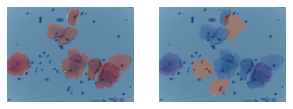

In [53]:
dls.show_batch(figsize=(5,5),unique=True)

In [52]:
dls.n_inp

1

In [57]:
learn = unet_learner(dls, resnet34)

RuntimeError: CUDA out of memory. Tried to allocate 36.00 MiB (GPU 0; 6.00 GiB total capacity; 4.15 GiB already allocated; 13.56 MiB free; 4.19 GiB reserved in total by PyTorch)

In [55]:

learn = unet_learner(dls, resnet34)
learn.fine_tune(1)

RuntimeError: CUDA out of memory. Tried to allocate 24.00 MiB (GPU 0; 6.00 GiB total capacity; 4.15 GiB already allocated; 13.56 MiB free; 4.19 GiB reserved in total by PyTorch)

(<AxesSubplot:>, <AxesSubplot:>)

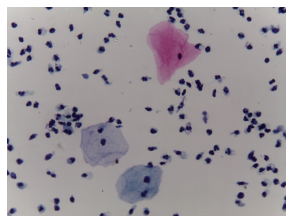

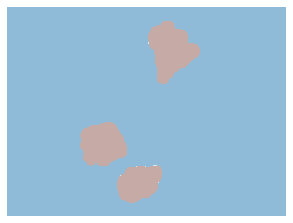

In [41]:
(x[1]).show(),(y[1]).show()

In [ ]:
C:\Users\ANANYA\Desktop\sgrr_cytology_images
dls.sh

(960, 1280)

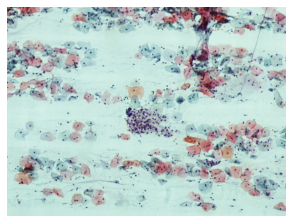

In [46]:
sgrr_path=Path(r'C:\Users\ANANYA\Desktop\sgrr_cytology_images')
img_sg=get_image_files(sgrr_path)[1]
img
img_fname = img_sg
img = PILImage.create(img_fname)
img.show(figsize=(5,5))
img.shape

In [25]:
Tissue.summary(img_path)

Setting-up type transforms pipelines
Found 2 items
2 datasets of sizes 2,0
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_msk -> PILBase.create

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\ANANYA\Desktop\cytology_segmenation_model\images\NL_1_ (13).jpg
    applying PILBase.create gives
      PILImage mode=RGB size=2048x1536
  Pipeline: get_msk -> PILBase.create
    starting from
      C:\Users\ANANYA\Desktop\cytology_segmenation_model\images\NL_1_ (13).jpg
    applying get_msk gives
      C:\Users\ANANYA\Desktop\cytology_segmenation_model\img_masks\NL_1__(13)_Cellular-Tissue.ome.jpg
    applying PILBase.create gives
      PILMask mode=L size=2048x1536

Final sample: (PILImage mode=RGB size=2048x1536, PILMask mode=L size=2048x1536)


Found 2 items
2 datasets of sizes 2,0
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_msk -> PILBase.create
Setting up after_item: Pipeline: AddMaskCodes -> ToTensor
Setting up before_batch: Pip

IndexError: list index out of range

In [22]:

y.histc(bins=3)
y_num=y.cpu().numpy()

(0.0, 3.0)

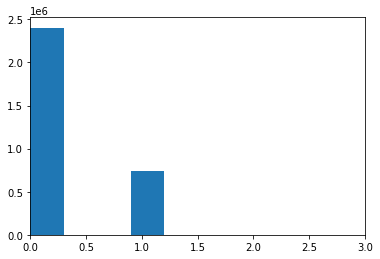

In [23]:
fig, ax = plt.subplots(1, 1)
ax.hist(y_num.flatten() ,range=[0, 3])
ax.set_xlim(0, 3)

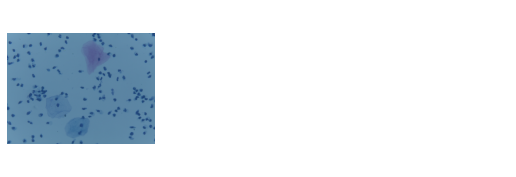

In [24]:
dls.show_batch(nrows=1, ncols=3)

In [113]:
 batch_tfms=[aug_transforms(size=576, min_scale=0.75,do_flip=True,flip_vert=True,max_warp=0.)]

In [114]:
batch_tfms

[[Dihedral -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 1.0}:
  encodes: (TensorImage,object) -> encodes
  (TensorMask,object) -> encodes
  (TensorBBox,object) -> encodes
  (TensorPoint,object) -> encodes
  decodes: ,
  Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}:
  encodes: (TensorImage,object) -> encodes
  decodes: ,
  RandomResizedCropGPU -- {'size': (576, 576), 'min_scale': 0.75, 'ratio': (1, 1), 'mode': 'bilinear', 'valid_scale': 1.0, 'p': 1.0}:
  encodes: (TensorImage,object) -> encodes
  decodes: ]]

Path('C:/Users/ANANYA/Desktop/cytology_segmenation_model/images/NL_1_ (13).jpg')

In [ ]:
camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                
                   get_y=get_msk,
                   batch_tfms=[*aug_transforms(size=half), Normalize.from_stats(*imagenet_stats)])

??DataBlock()

In [82]:
??DataBlock

Init signature:
DataBlock(
    blocks=None,
    dl_type=None,
    getters=None,
    n_inp=None,
    item_tfms=None,
    batch_tfms=None,
    *,
    get_items=None,
    splitter=None,
    get_y=None,
    get_x=None,
)
Source:        
class DataBlock():
    "Generic container to quickly build `Datasets` and `DataLoaders`"
    get_x=get_items=splitter=get_y = None
    blocks,dl_type = (TransformBlock,TransformBlock),TfmdDL
    _methods = 'get_items splitter get_y get_x'.split()
    _msg = "If you wanted to compose several transforms in your getter don't forget to wrap them in a `Pipeline`."
    def __init__(self, blocks=None, dl_type=None, getters=None, n_inp=None, item_tfms=None, batch_tfms=None, **kwargs):
        blocks = L(self.blocks if blocks is None else blocks)
        blocks = L(b() if callable(b) else b for b in blocks)
        self.type_tfms = blocks.attrgot('type_tfms', L())
        self.default_item_tfms  = _merge_tfms(*blocks.attrgot('item_tfms',  L()))
        self.default_

In [4]:
valid_fnames = (path/'valid.txt').read_text().split('\n')`

In [5]:
path_im = path/'images'
path_lbl = path/'labels'

In [6]:
fnames = get_image_files(path_im)
lbl_names = get_image_files(path_lbl)

<AxesSubplot:>

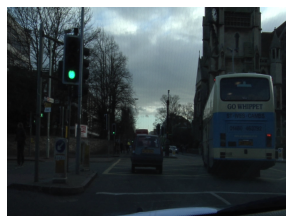

In [7]:
img_fname = fnames[10]
img = PILImage.create(img_fname)
img.show(figsize=(5,5))

In [8]:
get_msk = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}'

<AxesSubplot:>

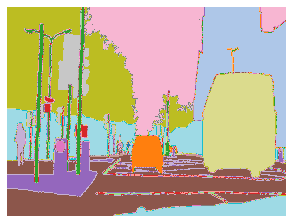

In [9]:
msk = PILMask.create(get_msk(img_fname))
msk.show(figsize=(5,5), alpha=1)

In [14]:
tensor(msk)


tensor([[26, 26, 26,  ..., 21, 21, 21],
        [26, 26, 26,  ..., 21, 21, 21],
        [26, 26, 26,  ..., 21, 21, 21],
        ...,
        [17, 17, 17,  ..., 30, 30, 30],
        [17, 17, 17,  ..., 30, 30, 30],
        [17, 17, 17,  ..., 30, 30, 30]], dtype=torch.uint8)

In [10]:
def FileSplitter(fname):
    "Split `items` depending on the value of `mask`."
    valid = Path(fname).read_text().split('\n') 
    def _func(x): return x.name in valid
    def _inner(o, **kwargs): return FuncSplitter(_func)(o)
    return _inner

In [12]:
sz = msk.shape; sz

(720, 960)

In [13]:
half = tuple(int(x/2) for x in sz); half

(360, 480)

In [80]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

NameError: name 'path' is not defined

In [49]:
camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                   splitter=FileSplitter(path/'valid.txt'),
                   get_y=get_msk,
                   batch_tfms=[*aug_transforms(size=half), Normalize.from_stats(*imagenet_stats)])


import torch
torch.cuda.empty_cache()

In [19]:
*2

SyntaxError: can't use starred expression here (<ipython-input-19-f0d32a5bf4e9>, line 1)

In [ ]:
[*aug_transforms(size=half), Normalize.from_stats(*imagenet_stats)]